<a href="https://colab.research.google.com/github/raylinpeguero78/Calidad-del-Vino/blob/main/vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

from sklearn.preprocessing import OneHotEncoder



In [31]:
data = pd.read_csv("vino.csv")

In [32]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
borracho = data[['pH','sulphates','alcohol']]
borracho

,pH,sulphates,alcohol
0,3.51,0.56,9.4
1,3.20,0.68,9.8
2,3.26,0.65,9.8
3,3.16,0.58,9.8
4,3.51,0.56,9.4
...,...,...,...
1594,3.45,0.58,10.5
1595,3.52,0.76,11.2
1596,3.42,0.75,11.0
1597,3.57,0.71,10.2


In [35]:
borracho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pH         1599 non-null   float64
 1   sulphates  1599 non-null   float64
 2   alcohol    1599 non-null   float64
dtypes: float64(3)
memory usage: 37.6 KB


In [34]:
Kmeans=KMeans(n_clusters=4,n_init=10).fit(borracho.values)
Kmeans.labels_

array([2, 2, 2, ..., 3, 0, 3], dtype=int32)

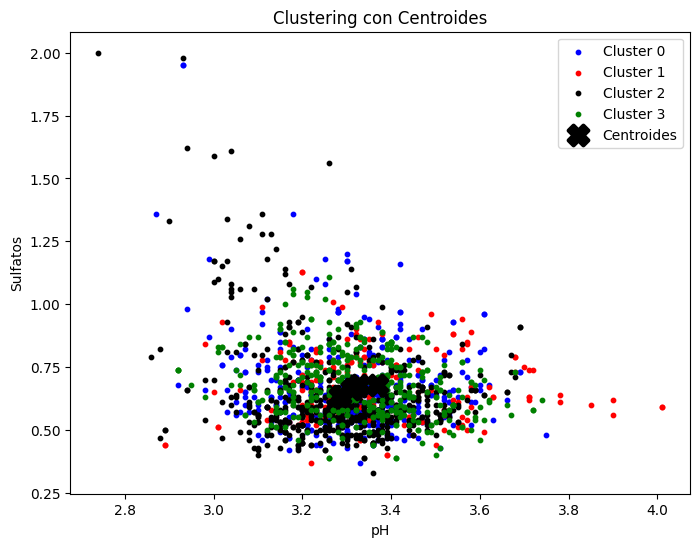

In [36]:

data["Cluster"] = Kmeans.labels_

plt.figure(figsize=(8, 6), dpi=100)

colors = ['blue', 'red', 'black', 'green']
for cluster in range(Kmeans.n_clusters):
  plt.scatter(data[data['Cluster'] == cluster]['pH'],
              data[data['Cluster'] == cluster]['sulphates'],
              color=colors[cluster], label=f'Cluster {cluster}', marker="o", s=10)

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1],
            marker="X", s=200, linewidths=3, color='black', label='Centroides')

plt.title("Clustering con Centroides")
plt.xlabel('pH')
plt.ylabel('Sulfatos')
plt.legend()
plt.show()



In [37]:
print(borracho['pH'].unique())
print(borracho['sulphates'].unique())

[3.51 3.2  3.26 3.16 3.3  3.39 3.36 3.35 3.28 3.58 3.17 3.11 3.38 3.04
 3.52 3.43 3.34 3.47 3.46 3.45 3.4  3.42 3.23 3.5  3.33 3.21 3.48 3.9
 3.25 3.32 3.15 3.41 3.44 3.31 3.54 3.13 2.93 3.14 3.75 3.85 3.29 3.08
 3.37 3.19 3.07 3.49 3.53 3.24 3.63 3.22 3.68 2.74 3.59 3.   3.12 3.57
 3.61 3.06 3.6  3.69 3.1  3.05 3.67 3.27 3.18 3.02 3.55 2.99 3.01 3.56
 3.03 3.62 2.88 2.95 2.98 3.09 2.86 3.74 2.92 3.72 2.87 2.89 2.94 3.66
 3.71 3.78 3.7  4.01 2.9 ]
[0.56 0.68 0.65 0.58 0.46 0.47 0.57 0.8  0.54 0.52 1.56 0.88 0.93 0.75
 1.28 0.5  1.08 0.53 0.91 0.63 0.59 0.55 0.66 0.6  0.73 0.48 0.83 0.51
 0.9  1.2  0.74 0.64 0.77 0.71 0.62 0.39 0.79 0.95 0.82 1.12 1.14 0.78
 1.95 1.22 1.98 0.61 1.31 0.69 0.67 0.7  0.49 0.92 2.   0.72 1.59 0.33
 1.02 0.97 0.85 0.43 1.03 0.86 0.76 1.61 1.09 0.84 0.96 0.45 1.26 0.87
 0.81 1.   1.36 1.18 0.89 0.98 1.13 1.04 1.11 0.99 1.07 0.44 1.06 1.05
 0.42 1.17 1.62 0.94 1.34 1.16 1.1  0.4  1.15 0.37 1.33 1.01]


In [38]:
print(borracho['pH'].value_counts())
print(borracho['sulphates'].value_counts())

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64
0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: sulphates, Length: 96, dtype: int64


In [39]:
borracho.count()

pH           1599
sulphates    1599
alcohol      1599
dtype: int64

In [40]:

borracho['pH'].nunique()
borracho['sulphates'].unique()
print(borracho)


        pH  sulphates  alcohol
0     3.51       0.56      9.4
1     3.20       0.68      9.8
2     3.26       0.65      9.8
3     3.16       0.58      9.8
4     3.51       0.56      9.4
...    ...        ...      ...
1594  3.45       0.58     10.5
1595  3.52       0.76     11.2
1596  3.42       0.75     11.0
1597  3.57       0.71     10.2
1598  3.39       0.66     11.0

[1599 rows x 3 columns]


In [41]:
# Definir los umbrales para binarizar 'pH' y 'sulphates'
umbral_pH = 3.5  # Por ejemplo, podemos elegir 3.5 como umbral para 'pH'
umbral_sulphates = 0.6  # Por ejemplo, podemos elegir 0.6 como umbral para 'sulphates'

# Convertir 'pH' a variable binaria
borracho['pH_binary'] = (borracho['pH'] > umbral_pH).astype(int)

# Convertir 'sulphates' a variable binaria
borracho['sulphates_binary'] = (borracho['sulphates'] > umbral_sulphates).astype(int)

# Eliminar las columnas originales 'pH' y 'sulphates' si es necesario
borracho.drop(columns=['pH', 'sulphates'], inplace=True)



<ipython-input-41-b07153c4526e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borracho['pH_binary'] = (borracho['pH'] > umbral_pH).astype(int)
<ipython-input-41-b07153c4526e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borracho['sulphates_binary'] = (borracho['sulphates'] > umbral_sulphates).astype(int)
<ipython-input-41-b07153c4526e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [42]:
borracho

,alcohol,pH_binary,sulphates_binary
0,9.4,1,0
1,9.8,0,1
2,9.8,0,1
3,9.8,0,0
4,9.4,1,0
...,...,...,...
1594,10.5,0,0
1595,11.2,1,1
1596,11.0,0,1
1597,10.2,1,1


In [43]:
x =borracho[['alcohol','pH_binary']]
y=borracho[['sulphates_binary']]

In [44]:
knn = KNeighborsClassifier()

# Entrenar el modelo solo con las características (x)


In [45]:

# Entrenar el modelo solo con las características (x)
knn.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,)
k=7
# Crear y entrenar el clasificador kNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# Hacer predicciones en el conjunto de prueba


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [47]:
prediction = knn.predict(x_test)
prediction

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [48]:
accuracy =accuracy_score(y_test,prediction)
print("la Precision de el modelo knn es:", accuracy)

la Precision de el modelo knn es: 0.575


In [49]:
from sklearn.metrics import confusion_matrix


In [50]:

# Suponiendo que ya se ha entrenado el modelo KNN y se han obtenido las predicciones

confusion_matrix = confusion_matrix(y_test, prediction)

# Cálculo de las probabilidades de predicción
probabilidades = confusion_matrix.diagonal() / confusion_matrix.sum(axis=1)

print("Probabilidades de predicción:", probabilidades)


Probabilidades de predicción: [0.42580645 0.71515152]


In [59]:

print("Probabilidad de la calidad de el PH:", probabilidades[0])
print("Probabilidad de de la calidad de  el sulphates:", probabilidades[1])


Probabilidad de la calidad de el PH: 0.4258064516129032
Probabilidad de de la calidad de  el sulphates: 0.7151515151515152
